# Clustering - Mini-Project 3

## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

# Data Inspection

In [ ]:
#checking first 5 rows
df.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [ ]:
#checking last 5 rows
df.tail()

mode        genres  acousticness  danceability    duration_ms    energy  \
2968     1          zolo      0.222625      0.547082  258099.064530  0.610240   
2969     0       zouglou      0.161000      0.863000  206320.000000  0.909000   
2970     1          zouk      0.263261      0.748889  306072.777778  0.622444   
2971     0  zurich indie      0.993000      0.705667  198417.333333  0.172667   
2972     1        zydeco      0.421038      0.629409  171671.690476  0.609369   

      instrumentalness  liveness   loudness  speechiness       tempo  \
2968          0.143872  0.204206 -11.295878     0.061088  125.494919   
2969          0.000000  0.108000  -5.985000     0.081300  119.038000   
2970          0.257227  0.089678 -10.289222     0.038778  101.965222   
2971          0.468633  0.179667 -11.453333     0.348667   91.278000   
2972          0.019248  0.255877  -9.854825     0.050491  126.366087   

       valence  popularity  key  
2968  0.596155   33.778943    9  
2969  0.845000   58.000000    7  
2970  0.824111   46.666667    5  
2971  0.739000    0.000000    7  
2972  0.808544   30.261905    7

In [ ]:
#checking null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
#checking statistics of data
df.describe(include='all')

mode                  genres  acousticness  danceability  \
count   2973.000000                    2973   2973.000000   2973.000000   
unique          NaN                    2973           NaN           NaN   
top             NaN  21st century classical           NaN           NaN   
freq            NaN                       1           NaN           NaN   
mean       0.833165                     NaN      0.401241      0.537187   
std        0.372891                     NaN      0.319760      0.150668   
min        0.000000                     NaN      0.000003      0.056900   
25%        1.000000                     NaN      0.119050      0.441202   
50%        1.000000                     NaN      0.321745      0.546496   
75%        1.000000                     NaN      0.673991      0.647500   
max        1.000000                     NaN      0.996000      0.929000   

         duration_ms       energy  instrumentalness     liveness     loudness  \
count   2.973000e+03  2973.000000       2973.000000  2973.000000  2973.000000   
unique           NaN          NaN               NaN          NaN          NaN   
top              NaN          NaN               NaN          NaN          NaN   
freq             NaN          NaN               NaN          NaN          NaN   
mean    2.517209e+05     0.561143          0.211366     0.192800   -10.509848   
std     9.465686e+04     0.234486          0.267329     0.092356     5.369202   
min     3.094600e+04     0.001002          0.000000     0.022200   -41.825000   
25%     2.063788e+05     0.395058          0.004835     0.137687   -12.427656   
50%     2.375453e+05     0.601195          0.080700     0.178764    -9.221817   
75%     2.772720e+05     0.730127          0.343333     0.220856    -6.920125   
max     2.382587e+06     0.994667          0.992000     0.960000     0.060000   

        speechiness        tempo      valence   popularity          key  
count   2973.000000  2973.000000  2973.000000  2973.000000  2973.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean       0.083588   119.018723     0.492748    39.919185     5.938782  
std        0.080483    17.469188     0.201820    16.748723     3.368110  
min        0.023800    47.135722     0.003353     0.000000     0.000000  
25%        0.044900   109.198143     0.348578    32.491279     3.000000  
50%        0.059457   119.194167     0.500048    43.056569     7.000000  
75%        0.091000   127.508750     0.640257    51.138889     9.000000  
max        0.946219   204.212000     0.980000    80.666667    11.000000

In [ ]:
#checking if there is any null values
df.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

No null values

In [ ]:
#checking the value counts in each column
for column in df.columns:
    print(f"{column} : {df[column].value_counts()}")
    print("====================================")

mode : 1    2477
0     496
Name: mode, dtype: int64
genres : 21st century classical    1
north carolina roots      1
nordic soundtrack         1
norman ok indie           1
norsk lovsang             1
                         ..
ethio-jazz                1
ethiopian pop             1
ethnomusicology           1
ethnotronica              1
zydeco                    1
Name: genres, Length: 2973, dtype: int64
acousticness : 0.040900    5
0.979000    5
0.988000    5
0.006635    4
0.993000    4
           ..
0.749000    1
0.941833    1
0.069033    1
0.101975    1
0.421038    1
Name: acousticness, Length: 2798, dtype: int64
danceability : 0.535000    6
0.521000    5
0.430000    5
0.568000    5
0.725000    5
           ..
0.647889    1
0.838500    1
0.546250    1
0.512518    1
0.629409    1
Name: danceability, Length: 2725, dtype: int64
duration_ms : 151480.000000    4
262165.782609    4
356480.000000    3
452507.000000    3
342760.000000    3
                ..
250636.166667    1
359127.5000

In [ ]:
#checking unique values per column
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

mode : [1 0]
genres : ['21st century classical' '432hz' '8-bit' ... 'zouk' 'zurich indie'
 'zydeco']
acousticness : [0.97933333 0.49478    0.762      ... 0.161      0.26326111 0.42103849]
danceability : [0.16288333 0.29933333 0.712      ... 0.74888889 0.70566667 0.62940873]
duration_ms : [ 160297.66666667 1048887.33333333  115177.         ...  306072.77777778
  198417.33333333  171671.69047619]
energy : [0.07131667 0.45067833 0.818      ... 0.62244444 0.17266667 0.60936905]
instrumentalness : [0.60683367 0.47776167 0.876      ... 0.257227   0.46863333 0.01924763]
liveness : [0.3616     0.131      0.126      ... 0.08967778 0.17966667 0.25587659]
loudness : [-31.51433333 -16.854       -9.18       ... -10.28922222 -11.45333333
  -9.8548254 ]
speechiness : [0.04056667 0.07681667 0.047      ... 0.03877778 0.34866667 0.05049127]
tempo : [ 75.3365     120.28566667 133.444      ... 101.96522222  91.278
 126.3660873 ]
valence : [0.10378333 0.22175    0.975      ... 0.845      0.82411111 0.80854

In [ ]:
#checking number of unique values in each column
for column in df.columns:
    print(f"{column} : {df[column].nunique()}")
    print("====================================")

mode : 2
genres : 2973
acousticness : 2798
danceability : 2725
duration_ms : 2872
energy : 2778
instrumentalness : 2731
liveness : 2709
loudness : 2873
speechiness : 2707
tempo : 2872
valence : 2745
popularity : 2188
key : 12


**We noticed that genres has [] which is empty, moreover duration_ms has 'e' which makes it difficult to understand, therefore we will handle them in data cleaning**

# Data Cleaning

In [ ]:
#dropping rows with [] from genre
dfgenre=df[df['genres']=='[]'].index
df=df.drop(dfgenre)

In [ ]:
df.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   
5     1                abstract      0.459210      0.516167  3.431965e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   
5  0.442417          0.849667  0.118067 -15.472083     0.046517  127.885750   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
4  0.448249   45.820071    7  
5  0.307325   43.500000    1

In [ ]:
df['duration_ms'] = df['duration_ms'] / 1e6
df.head()

mode                  genres  acousticness  danceability  duration_ms  \
0     1  21st century classical      0.979333      0.162883     0.160298   
1     1                   432hz      0.494780      0.299333     1.048887   
2     1                   8-bit      0.762000      0.712000     0.115177   
4     1              a cappella      0.676557      0.538961     0.190629   
5     1                abstract      0.459210      0.516167     0.343197   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   
5  0.442417          0.849667  0.118067 -15.472083     0.046517  127.885750   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
4  0.448249   45.820071    7  
5  0.307325   43.500000    1

# Exploratory Data Analysis

**Q1:What are the 5 most popular music genres?**

**Visualization**

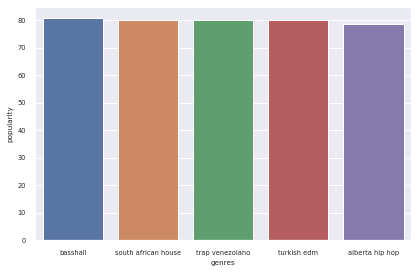

In [ ]:
df_pop=df.nlargest(5, 'popularity')
sns.barplot(data=df_pop, x='genres', y='popularity')
sns.set(font_scale=0.9)

**Answer for Q1:** Basshall, south african house, trap venezolano genres, turkish edm, alberta hip hop are the top 5 most popular music genres

**Q2:What factors affect the Popularity of the song ? (Mention the biggest 2 factors, with interpretation)**

To get the visualization of the heatmap we first need to find the correlation

In [ ]:
#correlation
correlation = df.corr()
correlation

mode  acousticness  danceability  duration_ms    energy  \
mode              1.000000      0.077240     -0.071234    -0.053170 -0.080268   
acousticness      0.077240      1.000000     -0.325010    -0.014024 -0.868257   
danceability     -0.071234     -0.325010      1.000000    -0.160638  0.299788   
duration_ms      -0.053170     -0.014024     -0.160638     1.000000 -0.048202   
energy           -0.080268     -0.868257      0.299788    -0.048202  1.000000   
instrumentalness -0.012659      0.273774     -0.383103     0.229421 -0.324964   
liveness         -0.002692     -0.076653     -0.055143     0.018643  0.168303   
loudness         -0.063660     -0.737279      0.453064    -0.137600  0.848966   
speechiness      -0.059175     -0.086229      0.242061     0.033247  0.119862   
tempo            -0.042880     -0.397669      0.082864    -0.046865  0.430789   
valence          -0.010274     -0.178256      0.652549    -0.257512  0.305207   
popularity       -0.031067     -0.458546      0.218019    -0.071111  0.337657   
key              -0.060159     -0.078907      0.029557    -0.029289  0.097237   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
mode                     -0.012659 -0.002692 -0.063660    -0.059175 -0.042880   
acousticness              0.273774 -0.076653 -0.737279    -0.086229 -0.397669   
danceability             -0.383103 -0.055143  0.453064     0.242061  0.082864   
duration_ms               0.229421  0.018643 -0.137600     0.033247 -0.046865   
energy                   -0.324964  0.168303  0.848966     0.119862  0.430789   
instrumentalness          1.000000 -0.050614 -0.537682    -0.196764 -0.201670   
liveness                 -0.050614  1.000000  0.123981     0.190112  0.002318   
loudness                 -0.537682  0.123981  1.000000     0.095334  0.407962   
speechiness              -0.196764  0.190112  0.095334     1.000000  0.001482   
tempo                    -0.201670  0.002318  0.407962     0.001482  1.000000   
valence                  -0.424091  0.000720  0.376596     0.092671  0.139605   
popularity               -0.265516 -0.094092  0.344315    -0.045112  0.146617   
key                      -0.069315  0.007279  0.083029     0.022294  0.081648   

                   valence  popularity       key  
mode             -0.010274   -0.031067 -0.060159  
acousticness     -0.178256   -0.458546 -0.078907  
danceability      0.652549    0.218019  0.029557  
duration_ms      -0.257512   -0.071111 -0.029289  
energy            0.305207    0.337657  0.097237  
instrumentalness -0.424091   -0.265516 -0.069315  
liveness          0.000720   -0.094092  0.007279  
loudness          0.376596    0.344315  0.083029  
speechiness       0.092671   -0.045112  0.022294  
tempo             0.139605    0.146617  0.081648  
valence           1.000000    0.023117  0.063627  
popularity        0.023117    1.000000  0.008700  
key               0.063627    0.008700  1.000000

In [ ]:
#correlation of all attributes with popularity
correlation['popularity'].sort_values(ascending=False, key=lambda x: x.abs())

popularity          1.000000
acousticness       -0.458546
loudness            0.344315
energy              0.337657
instrumentalness   -0.265516
danceability        0.218019
tempo               0.146617
liveness           -0.094092
duration_ms        -0.071111
speechiness        -0.045112
mode               -0.031067
valence             0.023117
key                 0.008700
Name: popularity, dtype: float64

**Visualization**

In [ ]:
#Visualizing correlation
plt.figure(figsize=(150,90))
sns.set(font_scale=9)
sns.heatmap(df_encode.corr(), annot=True, cmap='Reds');


**Answer for Q2**: Acousticness and Loudness/Energy (as they both have the same value for correlation) are the the biggest two factors that affect the popularity of the song, this is as Acousticness has a high negative correlation of 0.46, while Loudness/Energy have a second highest correlation which is 0.34.

**Q3: Which genre has the highest energy and which has the lowest?**

**Visualization**


In [ ]:
#sorting df based on descending order of energy
df_sort=df.sort_values(by=['energy'],ascending=False)
energy=df_sort.head()
energy

mode                 genres  acousticness  danceability  duration_ms  \
175      0         australian ska      0.000096      0.312667     0.211725   
2706     1        tennessee metal      0.000891      0.372000     0.264013   
1897     0  nederlandse hardstyle      0.076200      0.341000     0.237818   
348      0          brazilian ska      0.500000      0.320000     0.172176   
913      1      dutch death metal      0.000040      0.306000     0.279093   

        energy  instrumentalness  liveness  loudness  speechiness    tempo  \
175   0.994667          0.000183    0.1561    -4.356     0.158667  148.061   
2706  0.994333          0.040620    0.1780    -4.621     0.192667  122.180   
1897  0.994000          0.000000    0.3520     0.060     0.374000  157.607   
348   0.991000          0.000004    0.2260    -7.047     0.220000  167.532   
913   0.989000          0.000410    0.2700    -5.087     0.109000  103.006   

       valence  popularity  key  
175   0.228900   43.333333    9  
2706  0.105967   46.000000   11  
1897  0.220000    0.000000    1  
348   0.545000   13.000000    9  
913   0.134000   38.000000    2

<Figure size 460.8x345.6 with 0 Axes>

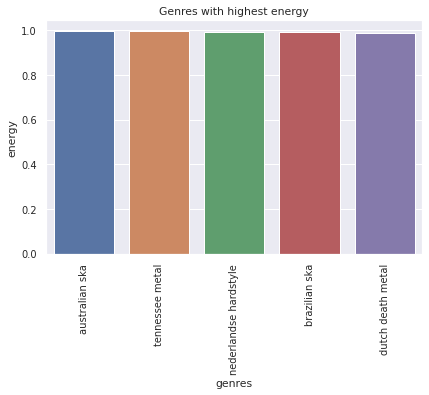

<Figure size 460.8x345.6 with 0 Axes>

In [ ]:
g=sns.barplot(data=energy, x=energy['genres'], y='energy')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Genres with highest energy')
plt.figure(figsize=(6.4,4.8))
#sns.set(font_scale=1)

In [ ]:
#sorting based on lowest energy
energy2=df_sort.tail()
energy2


mode                  genres  acousticness  danceability  duration_ms  \
1723     1                medieval        0.9950        0.5330     0.136072   
2476     1            singing bowl        0.9160        0.0569     0.554747   
1611     1  korean classical piano        0.9935        0.3795     0.135913   
328      1             brain waves        0.9935        0.4395     0.122175   
283      1                binaural        0.9935        0.4395     0.122175   

        energy  instrumentalness  liveness  loudness  speechiness   tempo  \
1723  0.004440            0.7960    0.1110  -29.4720      0.06040  80.919   
2476  0.004130            0.9710    0.1200  -30.6840      0.05750  56.436   
1611  0.003950            0.9465    0.0986  -37.6195      0.05245  68.906   
328   0.001002            0.8025    0.1090  -41.8250      0.07950  68.144   
283   0.001002            0.8025    0.1090  -41.8250      0.07950  68.144   

      valence  popularity  key  
1723   0.1760         0.0    8  
2476   0.0245        45.0    3  
1611   0.3495        49.0    8  
328    0.1841        59.0    3  
283    0.1841        59.0    3

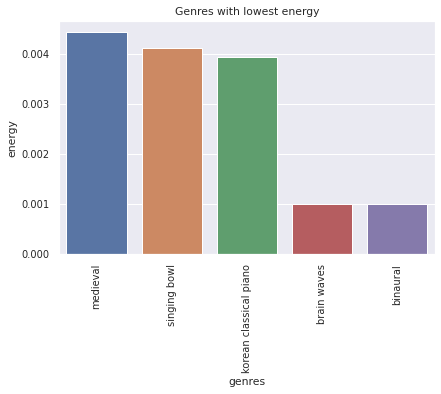

<Figure size 460.8x345.6 with 0 Axes>

In [ ]:
g=sns.barplot(data=energy2, x=energy2['genres'], y='energy')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Genres with lowest energy')
plt.figure(figsize=(6.4,4.8))
sns.set(font_scale=2)

**Answer for Q3:** Australian ska, tennessee metal, nederlandse hardstyle, brazilian ska, dutch death metal are the music genres with the highest energy, meanwhile, medieval, singing bowl, korean classical piano, brain waves and binaural are the music genres with the lowest energy



**Q4: What are the most correlated pairs of attributes ? (Mention 2 pairs, with interpretation)**

**Visualization**

In [ ]:
plt.figure(figsize=(150,90))
sns.set(font_scale=9)
sns.heatmap(df.corr(), annot=True, cmap='magma');

**Answer for Q4:** The 2 pairs are (acousticness, energy) and (loudness, energy) where the first pair has a correlation of -0.87 and the next pair has a correlation of 0.85

# Data Preparation 

In [ ]:
#copying df to df_temp
df_temp=df.copy()

In [ ]:
#storing genres column
dfgenres=df['genres']

In [ ]:
#dropping genres from df_temp
df_temp=df_temp.drop('genres',axis=1)

In [ ]:
#ensuring that genres is dropped 
df_temp.columns

Index(['mode', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')

In [ ]:
#z-scale normalization
from sklearn.preprocessing import StandardScaler 
scaled_data = StandardScaler().fit_transform(df_temp)
scaled_data

array([[ 0.44757469,  1.80834218, -2.48432022, ..., -1.92725355,
        -0.72213868,  0.01828198],
       [ 0.44757469,  0.2928222 , -1.57868449, ..., -1.34273793,
         0.75093152, -0.2786254 ],
       [ 0.44757469,  1.12859655,  1.16023582, ...,  2.38955698,
         0.48219574,  0.31518936],
       ...,
       [ 0.44757469, -0.43129108,  1.405072  , ...,  1.64191432,
         0.40257032, -0.2786254 ],
       [-2.23426397,  1.85108692,  1.1182007 , ...,  1.22019541,
        -2.38431924,  0.31518936],
       [ 0.44757469,  0.06218354,  0.61206723, ...,  1.56477877,
        -0.57710667,  0.31518936]])

# Clustering

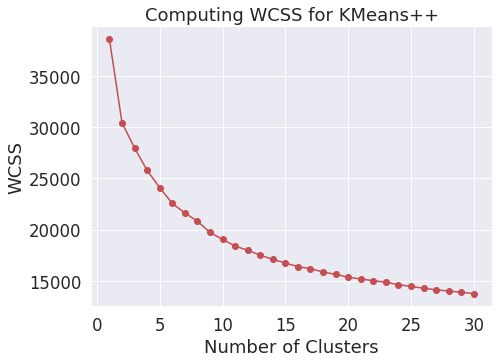

In [ ]:
#choosing k using the elbow method
from sklearn.cluster import KMeans
wcss = []
for k in range( 1, 31 ):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(scaled_data)
    wcss.append( kmeans.inertia_ )
    
plt.figure(figsize=(6.4,4.8))
sns.set(font_scale=1.5)
plt.plot(range(1, 31), wcss, 'o-r', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#we chose number of clusters to be 9 as it is local optimum
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)


df_temp["cluster"] = cluster_labels

# Clustering Interpretation

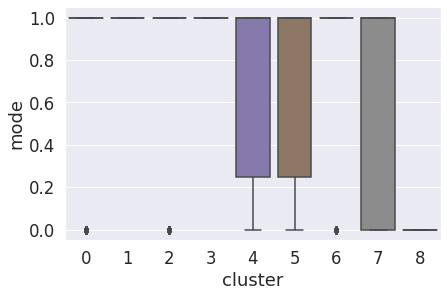

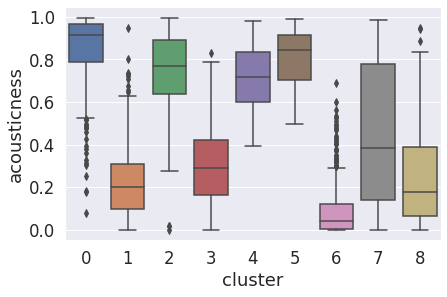

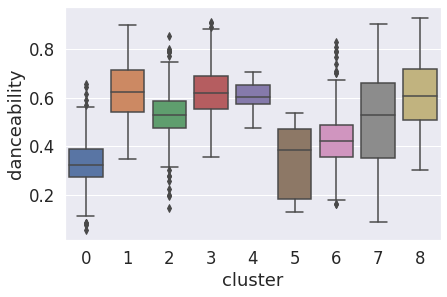

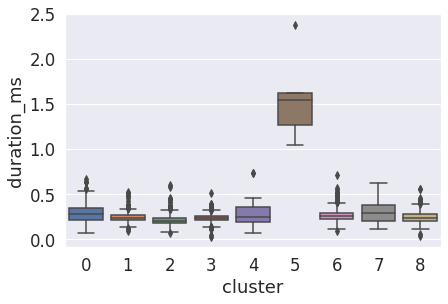

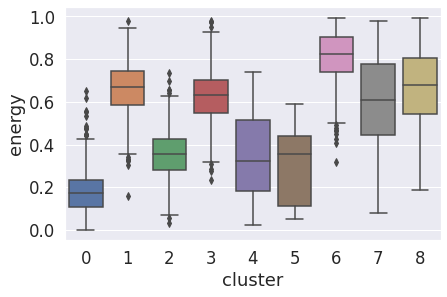

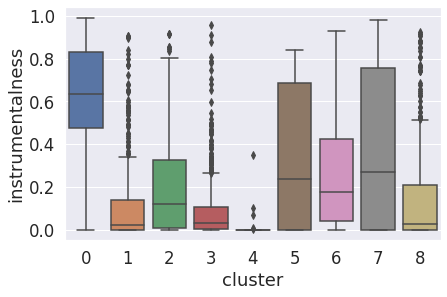

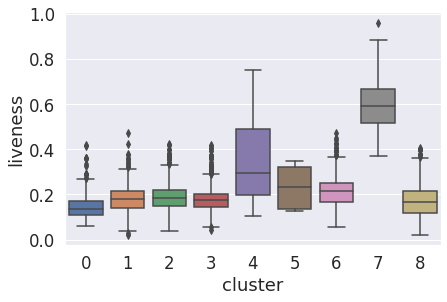

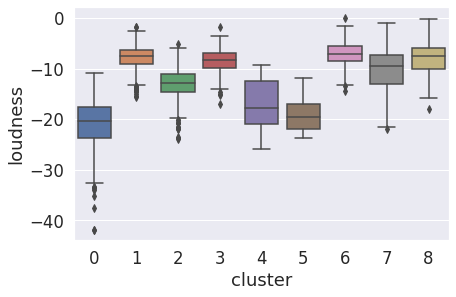

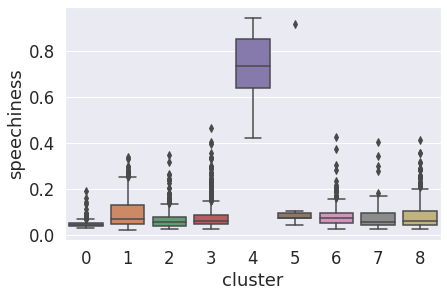

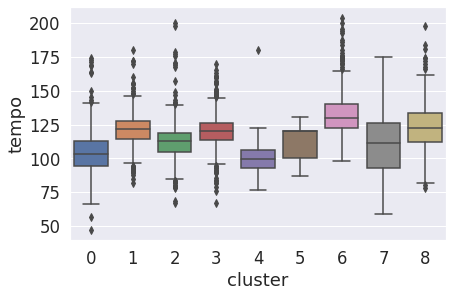

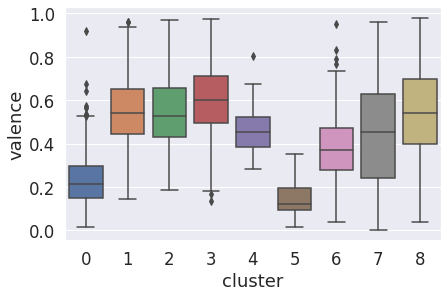

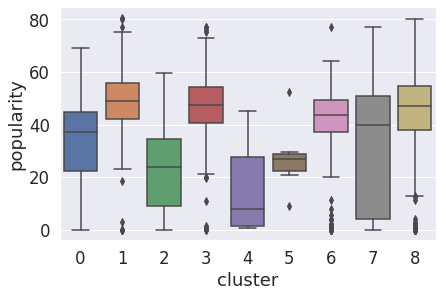

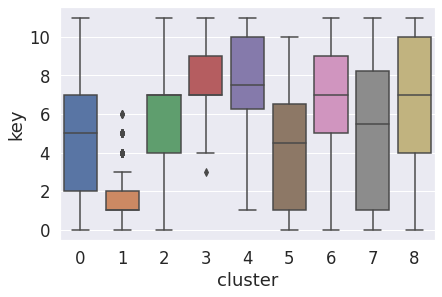

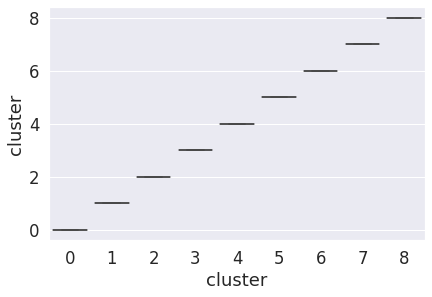

In [ ]:
for col in df_temp.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df_temp)

For the mode: 
Mode is 1 for clusters 0,1,2,3,6
The mode is widely distributed for clusters 4,5,7
Mode is 0 for clusters 8

Cluster 0 has:
1.   Highest acousticness 
2.   Lowest danceability
3.   One of the lowest duration_ms
4.   Lowest energy
5.   Highest instrumentalness
6.   Lowest liveness
7.   Lowest loudness
8.   Lowest speechiness
9.   Second lowest tempo
10.  Second lowest valence
11.  Fourth lowest popularity
12.  Third lowest key

Cluster 1 has:
1.   Third lowest acousticness
2.   Highest danceability 
3.   One of the lowest duration_ms
4.   Third highest energy
5.   Lowest instrumentalness
6.   Second lowest liveness
7.   Second highest loudness
8.   Second highest speechiness
9.   Third highest tempo
10.  Second highest valence
11.  Highest popularity
12.  Widely distributed key

Cluster 2 has:
1. Third highest acousticness
2. Fifth highest danceability
3. Lowest duration_ms
4. Third lowest energy
5. Fourth lowest instrumentalness
6. Fourth lowest liveness
7. Third lowest loudness
8. Second lowest speechiness
9. Second lowest tempo
10. Third highest valence
11. Second lowest popularity
12. Widely distibuted key

Cluster 3 has:
1. Fourth lowest acousticness
2. Second highest danceability
3. One of the lowest duration_ms
4. Fourth highest energy
5. Lowest instrumentalness
6. One of the lowest liveness
7. Fourth lowest loudness
8. One of the lowest speechiness
9. Fourth highest tempo
10. Highest valence
11. Second highest popularity
12. Widely distrbuted key

Cluster 4 has: 
1. Fourth highest acousticness
2. One of the highest danceability
3. One of the lowest duration_ms
4. Fourth lowest energy
5. Lowest instrumentalness
6. Second highest liveness
7. Highest key
8. Third lowest loudness
9. Highest speechiness
10. Lowest tempo
11. Four lowest valence
12. Lowest popularity

Cluster 5 has:
1. Second highest acousticness
2. Second lowest danceability
3. Highest duration_ms
4. One of the lowest energy
5. Third highest instrumentalness
6. Third highest liveness
7. Second lowest loudness
8. Widely distributed speechniness
9. Widely distributed tempo
10. Lowest valence
11. Fourth lowest popularity
12. Lowest key

Cluster 6 has:
1. Lowest acousticness
2. Third lowest danceability
3. One of the lowest duration_ms
4. Highest energy
5. Fourth highest instrumentalness
6. Fourth highest liveness
7. Highest loudness
8. One of the lowest speechiness
9. Highest tempo
10. Third lowest valence
11. Third highest popularity
12. Second highest key

Cluster 7 has:
1. Fifth highest acousticness
2. Sixth danceability
3. One of the lowest duration_ms
4. Fourth highest energy
5. Second highest instrumentalness
6. Highest liveness
7. Third highest loudness
8. One of the lowest speechiness
9. One of the lowest tempo
10. Fifth highest valence
11. Fifth highest popularity
12. Third lowest key

Cluster 8 has:
1. Second lowest acousticness
2. One of the highest danceability
3. One of the lowest duration_ms
4. Second highest energy
5. Third lowest instrumentalness
6. One of the lowest liveness
7. One of the highest loudness
8. One of the lowest speechiness
9. Second highest tempo
10. Fourth highest valence
11. Third highest popularity
12. Third highest key



In [ ]:
#joining cluster to original df
#df["cluster"] = cluster_labels

In [ ]:
#joining genres to df_temp
df_temp['genres']=dfgenres

In [ ]:
df_temp.columns

Index(['mode', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'cluster', 'genres'],
      dtype='object')

In [ ]:
df_temp.head()

mode  acousticness  danceability  duration_ms    energy  instrumentalness  \
0     1      0.979333      0.162883     0.160298  0.071317          0.606834   
1     1      0.494780      0.299333     1.048887  0.450678          0.477762   
2     1      0.762000      0.712000     0.115177  0.818000          0.876000   
4     1      0.676557      0.538961     0.190629  0.316434          0.003003   
5     1      0.459210      0.516167     0.343197  0.442417          0.849667   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333    6   
1  0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000    5   
2  0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000    7   
4  0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071    7   
5  0.118067 -15.472083     0.046517  127.885750  0.307325   43.500000    1   

   cluster                  genres  
0        0  21st century classical  
1        5                   432hz  
2        3                   8-bit  
4        2              a cappella  
5        0                abstract

**Sampling**

In [ ]:
#displaying the genres for each cluster
dftmp=df_temp.groupby('cluster')
arr=dftmp['genres'].unique().tolist()
arr

[array(['21st century classical', 'abstract', 'acousmatic',
        'african-american classical', 'ambient', 'ambient pop',
        'american 21st century classical', 'american choir',
        'american classical piano', 'american contemporary classical',
        'american early music', 'american orchestra', 'american post-rock',
        'american primitive', 'american romanticism', 'anglican liturgy',
        'arabic jazz', 'armenian folk', 'art song', 'asmr', 'atmosphere',
        'australian ambient', 'australian choir', 'australian classical',
        'australian classical piano', 'austrian choir',
        'austrian classical piano', 'austrian orchestra', 'avant-garde',
        'background music', 'background piano', 'balkan classical piano',
        'ballet class', 'baltic classical', 'bansuri', 'barockinterpreten',
        'baroque', 'baroque brass', 'baroque ensemble', 'baroque singing',
        'baroque violin', 'belgian classical piano',
        'belgian contemporary classical

In [ ]:
#displaying 5 random samples of genres from each cluster group
dftmp.sample(n=5)

mode  acousticness  danceability  duration_ms    energy  \
150      1      0.987000      0.301000     0.367667  0.008900   
1417     1      0.988000      0.521000     0.313253  0.088900   
945      1      0.779949      0.370561     0.346426  0.234635   
384      1      0.614011      0.256016     0.213913  0.279439   
208      1      0.789690      0.397524     0.248851  0.219857   
1730     1      0.001490      0.443000     0.312227  0.737000   
2220     1      0.118254      0.504075     0.213233  0.736407   
2257     1      0.292013      0.475708     0.239254  0.587153   
1796     1      0.252839      0.719429     0.266361  0.683606   
1333     1      0.103591      0.795273     0.260261  0.634856   
1855     1      0.960200      0.644200     0.162554  0.424200   
2727     1      0.831229      0.612762     0.225019  0.306033   
324      1      0.538447      0.443991     0.243773  0.431575   
1274     1      0.649302      0.565533     0.206615  0.396700   
1310     1      0.699461      0.621823     0.155432  0.421529   
1306     1      0.512883      0.517458     0.215866  0.462503   
528      1      0.421479      0.664617     0.221023  0.519023   
568      1      0.423545      0.502975     0.299867  0.404299   
1309     1      0.552000      0.725000     0.274693  0.526000   
451      1      0.526142      0.543470     0.240724  0.441498   
929      1      0.790171      0.571370     0.370382  0.154361   
1304     1      0.483266      0.661781     0.278066  0.192655   
1931     1      0.852325      0.553775     0.258054  0.697725   
656      1      0.764489      0.567123     0.259288  0.670889   
1184     1      0.587000      0.612000     0.196053  0.022400   
1297     1      0.913000      0.473000     1.622000  0.049200   
1        1      0.494780      0.299333     1.048887  0.450678   
401      0      0.681000      0.130033     2.382587  0.404833   
1775     1      0.773000      0.145250     1.208667  0.309500   
1879     1      0.913000      0.473000     1.622000  0.049200   
1180     1      0.001152      0.269111     0.297462  0.913333   
2499     0      0.000003      0.161000     0.276107  0.976000   
2901     1      0.001090      0.360067     0.227366  0.936486   
362      1      0.004350      0.335875     0.300415  0.893725   
2038     1      0.000254      0.548000     0.133400  0.935000   
185      1      0.886000      0.727000     0.148467  0.265000   
225      1      0.832167      0.531000     0.363491  0.217650   
1883     1      0.242454      0.501167     0.380209  0.600042   
1009     1      0.503000      0.651000     0.197040  0.465000   
920      1      0.974000      0.316000     0.557867  0.077900   
1114     0      0.334712      0.659694     0.196060  0.680917   
1110     0      0.094652      0.857500     0.245171  0.643417   
910      0      0.189000      0.406000     0.206333  0.526000   
922      0      0.322456      0.654687     0.199664  0.605847   
1574     0      0.115783      0.713647     0.203813  0.827460   

      instrumentalness  liveness   loudness  speechiness       tempo  \
150       9.070000e-01  0.101000 -30.804000     0.037100  127.536000   
1417      1.820000e-01  0.096500 -19.457000     0.050700  115.430000   
945       6.337293e-01  0.134942 -20.752622     0.046016  112.368265   
384       7.414594e-01  0.161896 -17.675635     0.050906  103.274676   
208       4.443799e-01  0.170132 -20.836721     0.047120  107.470657   
1730      3.200000e-03  0.121000  -4.509000     0.029300  115.277000   
2220      6.878172e-02  0.182193  -8.765246     0.053054  131.341708   
2257      1.052811e-01  0.220004 -10.635116     0.062883  122.922524   
1796      5.034081e-03  0.235460  -6.505814     0.150296  113.097712   
1333      1.572629e-02  0.181612  -7.104664     0.224287  103.743392   
1855      9.138000e-01  0.164800 -13.111200     0.041380   85.598800   
2727      1.670599e-01  0.172349 -10.534724     0.160494  101.044705   
324       4.210936e-01  0.181153 -13.376119     0.055813  118.445178   
1274   